In [1]:
# imports and load model
import torch
import torchvision
from torchvision.utils import draw_bounding_boxes

from ultralytics import YOLO
import matplotlib.pyplot as plt
import random
import cv2
import numpy as np
from scipy.optimize import linear_sum_assignment
import os

best = 'best.pt'
model = YOLO(best)
default = YOLO('yolov5su.pt')

In [2]:
def get_box_xywh(image, model):
    results = model(image, classes = 0)
    for result in results:
        boxes = result.boxes
    boxes = boxes.xyxy

    x = cv2.imread(image).shape[1]
    y = cv2.imread(image).shape[0]
    x_center = ((boxes[:, 0] + boxes[:, 2]) / 2) / x
    y_center = ((boxes[:, 1] + boxes[:, 3]) / 2) / y
    width = (boxes[:, 2] - boxes[:, 0]) / x
    height = (boxes[:, 3] - boxes[:, 1]) / y

    array = np.column_stack((np.zeros(boxes.shape[0]), x_center.numpy(), y_center.numpy(), width.numpy(), height.numpy()))
    return array

In [3]:
def get_box_xyxy(boxes):
    boxes_tensor = torch.zeros((len(boxes), 4)) 
    for i, box in enumerate(boxes):
        _, x_center, y_center, width, height = box
        
        x_min = (x_center - width / 2) * x
        y_min = (y_center - height / 2) * y
        x_max = (x_center + width / 2 ) * x
        y_max = (y_center + height / 2 ) * y
        
        boxes_tensor[i] = torch.tensor([x_min, y_min, x_max, y_max])
    return boxes_tensor


image 1/1 /Users/tsigall/Repositories/dsan6600/data/image2.png: 416x640 18 persons, 72.7ms
Speed: 1.7ms preprocess, 72.7ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 640)


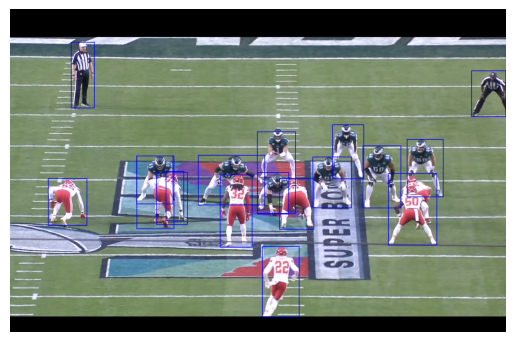

In [20]:
img = 'data/image2.png'

x = cv2.imread(img).shape[1]
y = cv2.imread(img).shape[0]

boxes = get_box_xywh(img, default)
default_tensor = get_box_xyxy(boxes)

box_model = draw_bounding_boxes(torchvision.io.read_image(img)[:3], boxes=default_tensor,
                            colors="blue",
                            width=4)

plt.imshow(box_model.permute(1, 2, 0)); plt.axis('off'); 
plt.savefig('default.png', dpi = 300)
plt.show()